<a href="https://colab.research.google.com/github/CYBORG670/DenmarkR-VARS-VECM-/blob/main/ProyectoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Credit_card.xlsx")
df.shape

(1548, 18)

In [ ]:
print(df.head())

    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0        

In [ ]:
df_label = pd.read_excel("/content/drive/MyDrive/Credit_card_label.xlsx")

In [ ]:
df_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
df = pd.merge(df, df_label, on='Ind_ID', how='outer')

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
df.shape

(1548, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
from sklearn.impute import SimpleImputer

imputer =  SimpleImputer(missing_values=np.nan, strategy='mean')
cols_to_impute_numeric = ['Annual_income','Birthday_count']
df[cols_to_impute_numeric] = imputer.fit_transform(df[cols_to_impute_numeric])


imputer =  SimpleImputer(missing_values=np.nan, strategy = 'most_frequent' )
cols_to_impute_string = ['GENDER','Type_Occupation']
df[cols_to_impute_string] = imputer.fit_transform(df[cols_to_impute_string])

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.isna().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [ ]:
df.shape

(1548, 19)

In [ ]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Ind_ID
5008827    1
5142163    1
5024925    1
5143560    1
5068648    1
          ..
5148792    1
5142290    1
5095324    1
5118270    1
5053790    1
Name: count, Length: 1548, dtype: int64


GENDER
F    980
M    568
Name: count, dtype: int64


Car_Owner
N    924
Y    624
Name: count, dtype: int64


Propert_Owner
Y    1010
N     538
Name: count, dtype: int64


CHILDREN
0     1091
1      305
2      134
3       16
4        1
14       1
Name: count, dtype: int64


Annual_income
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: count, Length: 116, dtype: int64


Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64


EDUCATION
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary            

In [ ]:
df = df.drop(columns=['Ind_ID', 'Mobile_phone'], axis=1)
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,0,0,0,Laborers,2,1
1,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,0,Laborers,2,1
2,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,0,Laborers,2,1
3,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,0,Laborers,2,1
4,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,0,Laborers,2,1


In [ ]:
cols_to_le = ['GENDER', 'Car_Owner', 'Propert_Owner']
cols_to_ohe = ['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cols_to_le:
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,0,0,0,Laborers,2,1
1,0,1,0,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,0,Laborers,2,1
2,0,1,0,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,0,Laborers,2,1
3,0,1,0,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,0,Laborers,2,1
4,0,1,0,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,0,Laborers,2,1


In [ ]:
df = pd.get_dummies(df, columns = cols_to_ohe, dtype=int)

In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,0,180000.00000,-18772.000000,365243,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,315000.00000,-13557.000000,-586,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,315000.00000,-16040.342071,-586,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,191399.32623,-13557.000000,-586,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,315000.00000,-13557.000000,-586,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(1548, 50)

In [ ]:
X = df.drop(columns=['label'], axis=1)

In [ ]:
X.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,0,180000.00000,-18772.000000,365243,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,315000.00000,-13557.000000,-586,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,315000.00000,-16040.342071,-586,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,191399.32623,-13557.000000,-586,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,315000.00000,-13557.000000,-586,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
y = df['label']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1238, 49)
(1238,)
(310, 49)
(310,)


In [ ]:
X_train.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
310,1,0,0,0,135000.0,-17154.0,-1649,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1484,0,1,1,0,135000.0,-12175.0,-1463,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1210,0,0,0,0,112500.0,-10344.0,-2533,0,0,0,...,1,0,0,0,0,0,0,0,0,0
829,1,1,0,0,180000.0,-14084.0,-2696,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53,1,1,0,1,135000.0,-9594.0,-866,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols_to_scale = ['Annual_income', 'Birthday_count','Employed_days']
X_train[cols_to_scale] = sc.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = sc.transform(X_test[cols_to_scale])

In [ ]:
X_train[:5]

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
310,1,0,0,0,-0.479114,-0.272548,-0.445640,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1484,0,1,1,0,-0.479114,0.905443,-0.444296,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1210,0,0,0,0,-0.675430,1.338642,-0.452029,0,0,0,...,1,0,0,0,0,0,0,0,0,0
829,1,1,0,0,-0.086481,0.453789,-0.453207,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53,1,1,0,1,-0.479114,1.516086,-0.439982,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.value_counts()

label
0    1098
1     140
Name: count, dtype: int64

<BarContainer object of 2 artists>

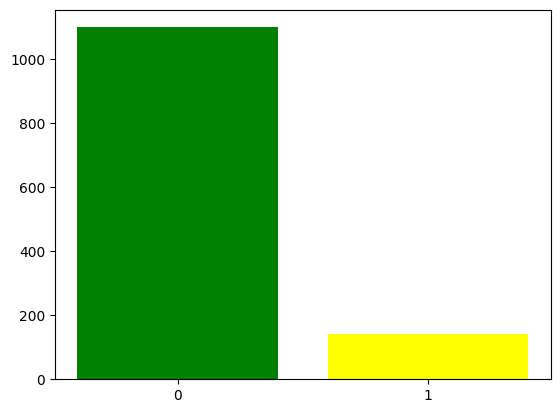

In [ ]:
negative,positive = y_train.value_counts()
plt.bar(['0','1'],[negative,positive],color=['green','yellow'])

Without balancing

In [ ]:
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

def algorithms(X_train, y_train, X_test=X_test, y_test=y_test):

    regressor = LogisticRegression(random_state = 42, max_iter=1000)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, cmap='summer',annot=True)
    plt.title(f'Logistic Regression: Accuracy = {accuracy_score(y_pred,y_test)}')
    plt.show()

    perceptron = Perceptron(random_state=42, eta0 =0.1)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, cmap='summer',annot=True)
    plt.title(f'Perceptron: Accuracy = {accuracy_score(y_pred,y_test)}')
    plt.show()

    clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, cmap='summer',annot=True)
    plt.title(f'Decision Tree: Accuracy = {accuracy_score(y_pred,y_test)}')
    plt.show()

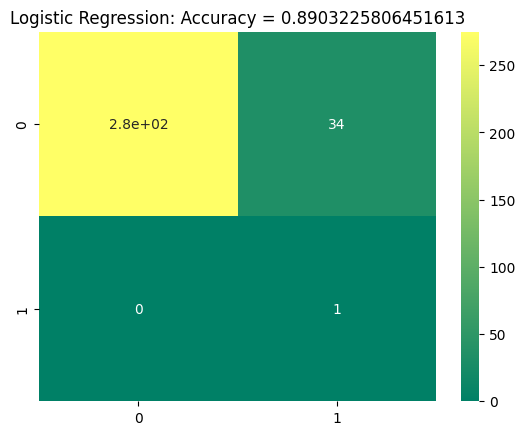

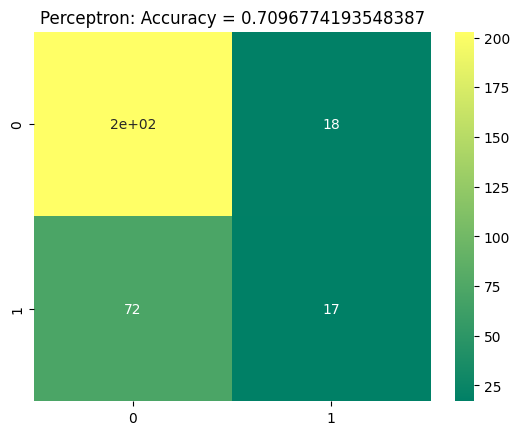

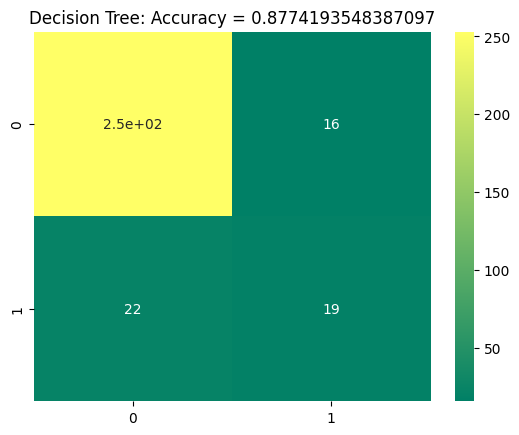

In [ ]:
algorithms(X_train,y_train)

<BarContainer object of 2 artists>

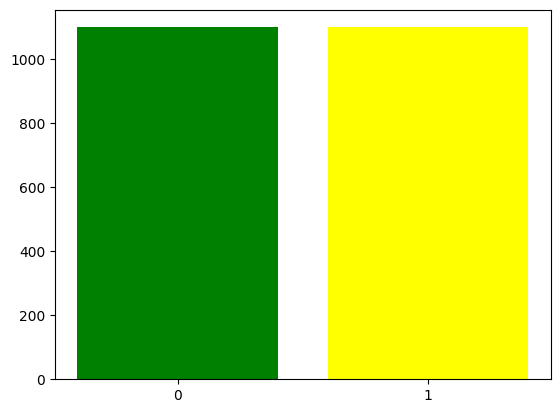

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
negative,positive = y_resampled.value_counts()
plt.bar(['0','1'],[negative,positive],color=['green','yellow'])

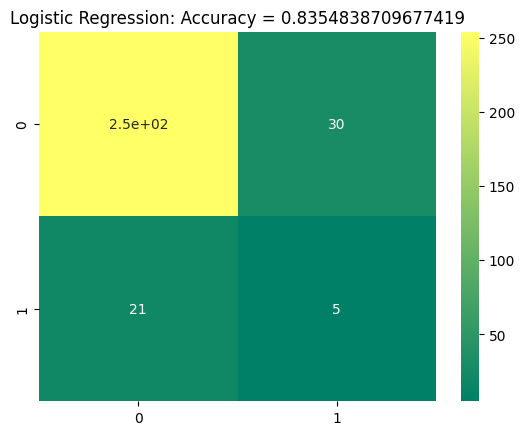

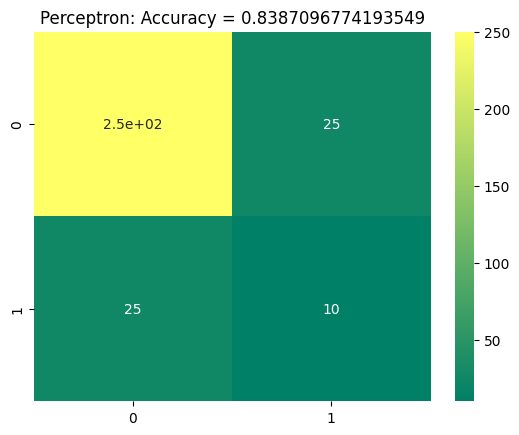

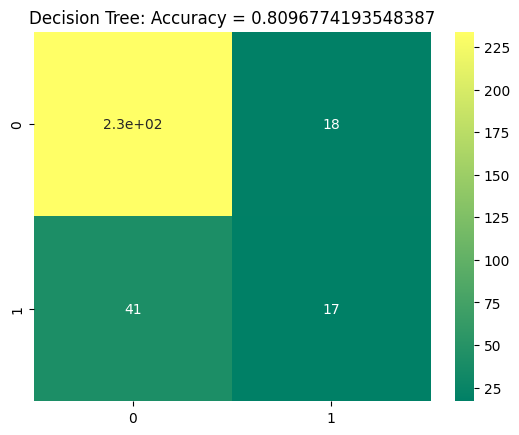

In [ ]:
algorithms(X_resampled, y_resampled)

<BarContainer object of 2 artists>

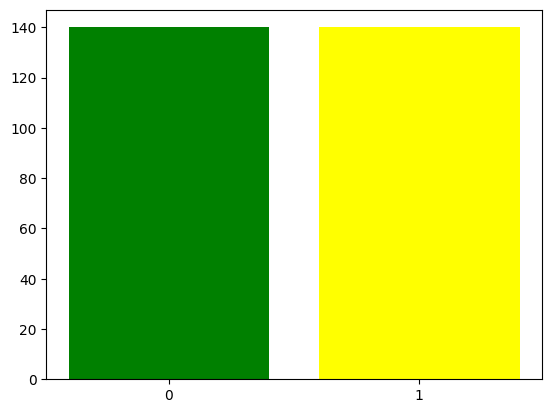

In [ ]:
from imblearn.under_sampling import NearMiss
nm =  NearMiss()
X_nm_resampled, y_nm_resampled = nm.fit_resample(X_train, y_train)
negative,positive = y_nm_resampled.value_counts()
plt.bar(['0','1'],[negative,positive],color=['green','yellow'])

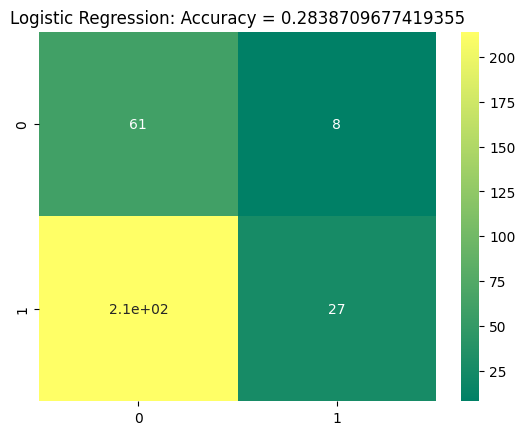

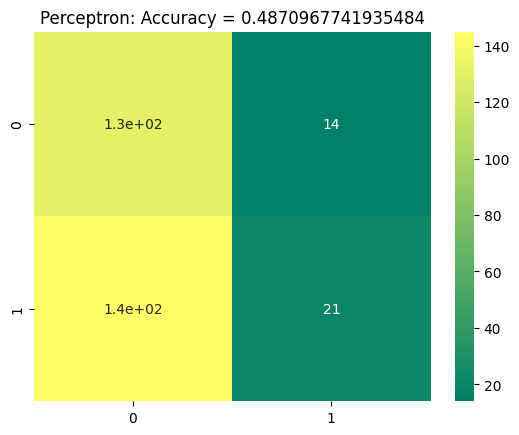

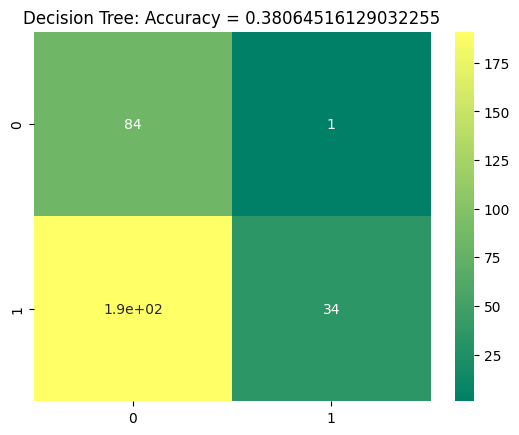

In [ ]:
algorithms(X_nm_resampled, y_nm_resampled)

In [ ]:
###Using Artificial Neural Networks
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=10)

Epoch 1/10
39/39 [==============================] - 3s 7ms/step - loss: 0.3886 - accuracy: 0.8869
Epoch 2/10
39/39 [==============================] - 0s 6ms/step - loss: 0.3438 - accuracy: 0.8869
Epoch 3/10
39/39 [==============================] - 0s 6ms/step - loss: 0.3291 - accuracy: 0.8869
Epoch 4/10
39/39 [==============================] - 0s 8ms/step - loss: 0.3082 - accuracy: 0.8869
Epoch 5/10
39/39 [==============================] - 0s 8ms/step - loss: 0.2904 - accuracy: 0.8918
Epoch 6/10
39/39 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.9023
Epoch 7/10
39/39 [==============================] - 0s 8ms/step - loss: 0.3073 - accuracy: 0.8901
Epoch 8/10
39/39 [==============================] - 0s 8ms/step - loss: 0.2694 - accuracy: 0.9031
Epoch 9/10
39/39 [==============================] - 0s 8ms/step - loss: 0.2650 - accuracy: 0.9023
Epoch 10/10
39/39 [==============================] - 0s 7ms/step - loss: 0.2557 - accuracy: 0.9006


<Axes: >

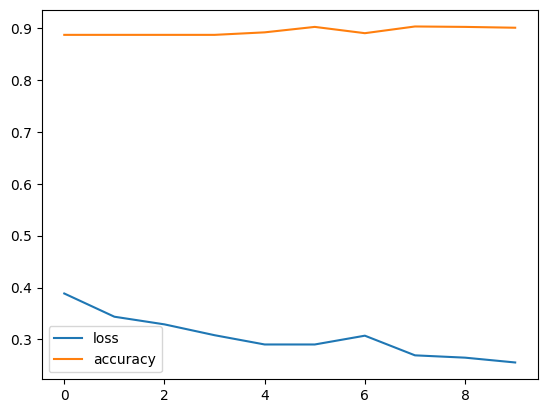

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [ ]:
accuracy_score(y_test, tf.round(y_pred))

0.9032258064516129

<Axes: >

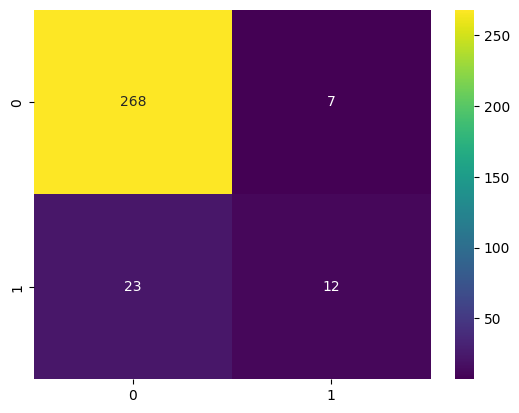

In [ ]:
cm = confusion_matrix(y_test, tf.round(y_pred))
sns.heatmap(cm, annot=True, cmap='viridis',fmt='d')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tf.round(y_pred)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       275
           1       0.63      0.34      0.44        35

    accuracy                           0.90       310
   macro avg       0.78      0.66      0.70       310
weighted avg       0.89      0.90      0.89       310

